<a href="https://colab.research.google.com/github/be-next/TP-IA/blob/main/TP_IA_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy

Avec **NumPy**, des opérations complexes comme l'inversion d'une matrice et la multiplication de matrices peuvent être effectuées facilement et efficacement avec peu de lignes de code. **NumPy** utilise des optimisations de bas niveau pour rendre ces opérations extrêmement rapides, même pour de grandes matrices, ce qui serait beaucoup plus lent et plus compliqué à implémenter en utilisant des listes Python pures.

In [1]:
import numpy as np

# Création d'un tableau numpy 2D (matrice) avec des valeurs aléatoires
matrice = np.random.rand(4,5)

# Calcul de quelques statistiques de base
moyenne = np.mean(matrice)
somme = np.sum(matrice)
maximum = np.max(matrice)
minimum = np.min(matrice)

# Effectuer une opération élément par élément: élever tous les éléments au carré
carre = matrice ** 2

# Calcul de la transposée de la matrice
transposee = matrice.T

# Effectuer une multiplication de matrices (produit dot)
produit = np.dot(matrice, transposee)

# Créer une sélection en utilisant une condition logique: éléments de 'matrice' > 0.5
selection = matrice[matrice > 0.5]

matrice, moyenne, somme, maximum, minimum, carre, transposee, produit, selection


(array([[0.68528912, 0.82956889, 0.37099385, 0.15095355, 0.73961997],
        [0.20831486, 0.81931929, 0.8651469 , 0.44825912, 0.82797374],
        [0.26882525, 0.3322071 , 0.6670295 , 0.26143045, 0.84752393],
        [0.13580946, 0.41308295, 0.36607864, 0.55074836, 0.4452898 ]]),
 0.5116732370893826,
 10.233464741787653,
 0.8651468959920358,
 0.13580946027194252,
 array([[0.46962118, 0.68818455, 0.13763644, 0.02278697, 0.5470377 ],
        [0.04339508, 0.6712841 , 0.74847915, 0.20093624, 0.68554052],
        [0.07226702, 0.11036156, 0.44492835, 0.06834588, 0.71829681],
        [0.01844421, 0.17063752, 0.13401357, 0.30332376, 0.19828301]]),
 array([[0.68528912, 0.20831486, 0.26882525, 0.13580946],
        [0.82956889, 0.81931929, 0.3322071 , 0.41308295],
        [0.37099385, 0.8651469 , 0.6670295 , 0.36607864],
        [0.15095355, 0.44825912, 0.26143045, 0.55074836],
        [0.73961997, 0.82797374, 0.84752393, 0.4452898 ]]),
 array([[1.86526685, 1.82345411, 1.37358502, 0.98404509],
 

In [2]:
import numpy as np

# Création d'une grande matrice de valeurs aléatoires
grande_matrice = np.random.rand(1000, 1000)

# Calcul de l'inverse de la matrice
inverse = np.linalg.inv(grande_matrice)

# Multiplication de matrices pour vérifier l'identité
produit = np.dot(grande_matrice, inverse)

# Vérification que le produit est proche de la matrice identité
est_identite = np.allclose(produit, np.eye(1000))

print("Le produit est-il égal à la matrice identité ? ", est_identite)


Le produit est-il égal à la matrice identité ?  True


# Pandas

La librairie Pandas permet la manipulation et l'analyse de données tabulaires.  Au centre de l'utilisation de Pandas, il y a le DataFrame, qui permet d'effectuer des calculs sur les colonnes, de trier les données, de filtrer selon certaines conditions et de regrouper les résultats pour obtenir des insights. Ces opérations sont couramment utilisées dans l'analyse de données et sont très simples à implémenter avec Pandas.

In [3]:
import pandas as pd

# Création d'un DataFrame Pandas à partir d'un dictionnaire
donnees = {
    'Pays': ['France', 'Espagne', 'Allemagne', 'Italie'],
    'Population': [67000000, 47000000, 83000000, 60000000],
    'Superficie': [643801, 505990, 357022, 301340]  # en kilomètres carrés
}

df = pd.DataFrame(donnees)

# Calcul de la densité de population pour chaque pays
df['Densité'] = df['Population'] / df['Superficie']

# Tri des pays par densité de population décroissante
df_trié = df.sort_values(by='Densité', ascending=False)

# Sélection des pays avec une population supérieure à 50 millions
df_grande_population = df[df['Population'] > 50000000]

# Utilisation de 'groupby' pour regrouper les données par une caractéristique
# Ici, juste à titre d'exemple, on va compter le nombre de pays par 'Population' supérieure ou inférieure à 65 millions
df['Catégorie Population'] = pd.cut(df['Population'], bins=[0, 65000000, 100000000], labels=['< 65M', '> 65M'])
grouped = df.groupby('Catégorie Population').size()

# Afficher les résultats
print(df_trié)
print(df_grande_population)
print(grouped)


        Pays  Population  Superficie     Densité
2  Allemagne    83000000      357022  232.478671
3     Italie    60000000      301340  199.110639
0     France    67000000      643801  104.069425
1    Espagne    47000000      505990   92.887211
        Pays  Population  Superficie     Densité
0     France    67000000      643801  104.069425
2  Allemagne    83000000      357022  232.478671
3     Italie    60000000      301340  199.110639
Catégorie Population
< 65M    2
> 65M    2
dtype: int64


# SciPy

## Optimisation

Dans cet exemple, ```minimize``` est une fonction de **SciPy** qui permet de trouver le minimum d'une fonction avec des contraintes possibles. Ici, nous définissons une fonction objectif simple (la somme des puissances de trois variables) et une contrainte d'égalité. Le résultat retourné par ```minimize``` donne le point minimum local de la fonction objectif tout en respectant la contrainte définie. Cet exemple illustre comment **SciPy** peut être utilisé pour résoudre des problèmes complexes d'optimisation qui sont très courants dans les domaines scientifiques et de l'ingénierie.

In [6]:
from scipy.optimize import minimize

# Fonction objectif : on souhaite minimiser cette fonction
def fonction_objectif(x):
    return x[0]**2 + x[1]**3 + x[2]**4

# Contrainte d'égalité : la somme des variables doit être égale à 10
def contrainte_eg(x):
    return sum(x) - 10

# Contraintes définies sous forme de dictionnaire
contraintes = ({'type': 'eq', 'fun': contrainte_eg})

# Valeurs initiales pour les variables (point de départ de l'optimisation)
x0 = [0, 0, 0]

# Appel de la fonction 'minimize' pour résoudre le problème d'optimisation
resultat = minimize(fonction_objectif, x0, constraints=contraintes)

print("Le minimum trouvé est ", resultat.fun)
print("Les valeurs des variables qui minimisent la fonction objectif sont ", resultat.x)


Le minimum trouvé est  55.26992807728239
Les valeurs des variables qui minimisent la fonction objectif sont  [6.44913174 2.07334507 1.47752318]


## Régression linéare

Dans cet exemple, nous créons un ensemble de données synthétiques pour simuler la progression de l'épidémie de COVID, puis nous utilisons la fonction ```curve_fit``` de **SciPy** pour ajuster un modèle logistique aux données. Le résultat est un ensemble de paramètres qui décrit le mieux les données observées, et nous pouvons utiliser ces paramètres pour faire des prédictions ou comprendre la dynamique de l'épidémie.

Ce type d'analyse est fréquent dans les études épidémiologiques et montre comment les fonctions de **SciPy** peuvent être appliquées à des problèmes réels et complexes avec une quantité de code relativement réduite.

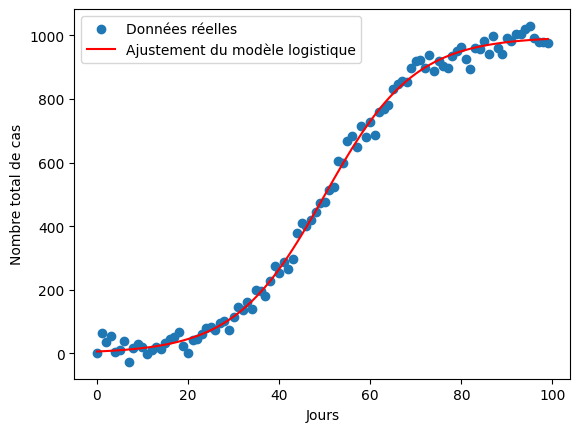

Capacité maximale estimée (K): 995.9524023289389
Nombre initial d'infectés estimé (P0): 6.245941634177177
Taux de croissance estimé (r): 0.101298555434373


In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Génération de données synthétiques: Jours vs Nombre total de cas
jours = np.arange(0, 100, 1)
nombre_de_cas = 1000 / (1 + np.exp(-0.1*(jours-50))) + np.random.normal(0, 25, 100)  # Un modèle logistique avec du bruit

# Fonction modèle logistique pour l'ajustement
def modele_logistique(x, K, P0, r):
    return K / (1 + ((K-P0)/P0)*np.exp(-r*x))

# Paramètres initiaux: K=capacité maximale, P0=nombre initial d'infectés, r=taux de croissance
parametres_initiaux = [10000, 1, 0.2]

# Ajustement de la courbe
parametres_optimaux, covariance = curve_fit(modele_logistique, jours, nombre_de_cas, p0=parametres_initiaux)

# Les paramètres optimaux de l'ajustement du modèle logistique
K_optimal, P0_optimal, r_optimal = parametres_optimaux

# Utilisation des paramètres optimaux pour prédire le nombre de cas
predictions = modele_logistique(jours, K_optimal, P0_optimal, r_optimal)

# Affichage des résultats
plt.scatter(jours, nombre_de_cas, label='Données réelles')
plt.plot(jours, predictions, label='Ajustement du modèle logistique', color='red')
plt.xlabel('Jours')
plt.ylabel('Nombre total de cas')
plt.legend()
plt.show()

print("Capacité maximale estimée (K):", K_optimal)
print("Nombre initial d'infectés estimé (P0):", P0_optimal)
print("Taux de croissance estimé (r):", r_optimal)


# Scikit-Learn

## Classification

Dans cet exemple, nous utilisons le célèbre jeu de données Iris pour construire un modèle de classification des espèces de fleurs d'iris à partir de leurs caractéristiques physiques.

Le processus de machine learning est le suivant :

 1. Charger un jeu de données standard (Iris).
 2. Séparer les données en un ensemble d'entraînement et un ensemble de test.
 3. Normaliser les caractéristiques pour améliorer les performances du modèle.
 4. Utiliser l'algorithme des K-Plus Proches Voisins (K-Nearest Neighbors) pour la classification.
 5. Entraîner le modèle sur les données d'entraînement.
 6. Faire des prédictions sur les données de test.
 7. Évaluer la performance du modèle à l'aide de la matrice de confusion et du rapport de classification.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Séparation des données en un jeu d'entraînement et un jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des caractéristiques pour améliorer la performance du modèle
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Construction du modèle de classification avec K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prédiction sur les données de test
predictions = model.predict(X_test)

# Evaluation du modèle
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Interprétation de la Matrice de Confusion :

La matrice de confusion est une matrice 3x3, car il y a trois classes dans le jeu de données Iris (représentées ici par 0, 1 et 2). Chaque ligne représente les instances réelles d'une classe, tandis que chaque colonne représente les prédictions de ces classes. Les valeurs diagonales (19, 13, 13) montrent le nombre de prédictions correctes pour chaque classe. Par exemple, il y avait 19 instances de la classe 0 dans l'ensemble de test, et le modèle a correctement prédit toutes ces 19 instances comme appartenant à la classe 0. De même, pour les classes 1 et 2, toutes les prédictions étaient correctes. Aucune instance n'a été mal classée, comme indiqué par les zéros dans les autres cellules de la matrice.

## Interprétation du Rapport de Classification :

  - Precision : Indique la précision des prédictions positives. Ici, pour chaque classe, la précision est de 1,00, ce qui signifie que chaque fois que le modèle a prédit une classe, il avait raison 100% du temps.
  - Recall : Indique la capacité du modèle à trouver toutes les instances positives. Pour chaque classe, le rappel est également de 1,00, ce qui signifie que le modèle a identifié correctement toutes les instances de chaque classe.
  - F1-score : C'est la moyenne harmonique de la précision et du rappel. Un score de 1,00 indique une performance parfaite.
  - Support : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.
  - Accuracy : La précision globale du modèle est de 1,00, ce qui signifie que 100% des prédictions étaient correctes.

## Principe de l'Algorithme des K-Plus Proches Voisins (K-Nearest Neighbors) :

Le **K-Nearest Neighbors** (KNN) est un algorithme simple mais puissant utilisé pour la classification (et la régression).

Le principe est le suivant :

Lorsqu'une nouvelle donnée doit être classée, l'algorithme recherche les K exemples les plus proches dans l'ensemble d'entraînement (où K est un paramètre).
La proximité est généralement mesurée à l'aide de distances, comme la distance euclidienne.
La nouvelle donnée est ensuite classée en prenant un vote majoritaire de ces K voisins. Par exemple, si K=3 et deux des trois voisins les plus proches appartiennent à la classe A et un à la classe B, la nouvelle donnée sera classée comme appartenant à la classe A.
Ce modèle est non-paramétrique et paresseux, ce qui signifie qu'il ne fait pas d'hypothèses sur la forme des données et qu'il ne construit pas de modèle explicite, mais effectue des calculs à chaque fois qu'une nouvelle prédiction est requise.

# PyTorch

Dans cet exemple, nous allons créer et entraîner un réseau de neurones simple pour classifier les images du jeu de données **MNIST**, qui est un ensemble standard de chiffres manuscrits.

Ce code montre plusieurs concepts clés de PyTorch :

  - Définition d'un réseau de neurones : La classe Net hérite de nn.Module et définit les couches du réseau.
  - Chargement des données : Utilisation de torchvision pour charger et transformer les données MNIST.
  - Entraînement : Boucle d'entraînement utilisant la descente de gradient stochastique et le calcul du gradient automatique.
  - Backpropagation : Utilisation de loss.backward() pour la rétropropagation automatique du gradient d'erreur.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Définition du réseau de neurones
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 500)  # 28x28 = 784, 500 neurones dans la couche cachée
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 10)  # 10 classes de sortie pour MNIST (0-9)

    def forward(self, x):
        x = x.view(-1, 784)  # Aplatir l'image
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Création de l'instance du réseau
net = Net()

# Chargement des données MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Entraînement du réseau
for epoch in range(5):  # boucle sur le jeu de données plusieurs fois
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # imprimer toutes les 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Entraînement terminé')


100%|██████████| 9912422/9912422 [00:00<00:00, 92498795.80it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71508674.04it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43659276.77it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12072578.43it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Batch 100, Loss: 0.8639506781101227
Epoch 1, Batch 200, Loss: 0.4020808307826519
Epoch 1, Batch 300, Loss: 0.36726748555898664
Epoch 1, Batch 400, Loss: 0.3180802232027054
Epoch 1, Batch 500, Loss: 0.29044078692793845
Epoch 1, Batch 600, Loss: 0.28458977937698365
Epoch 1, Batch 700, Loss: 0.25374816067516803
Epoch 1, Batch 800, Loss: 0.2535791529342532
Epoch 1, Batch 900, Loss: 0.2366312974691391
Epoch 2, Batch 100, Loss: 0.19901707667857407
Epoch 2, Batch 200, Loss: 0.19145781122148037
Epoch 2, Batch 300, Loss: 0.17193914640694857
Epoch 2, Batch 400, Loss: 0.17777576569467782
Epoch 2, Batch 500, Loss: 0.168876917026937
Epoch 2, Batch 600, Loss: 0.14270750973373653
Epoch 2, Batch 700, Loss: 0.15645579468458892
Epoch 2, Batch 800, Loss: 0.15223473029211163
Epoch 2, Batch 900, Loss: 0.1401814230531454
Epoch 3, Batch 100, Loss: 0.12700488533824683
Epoch 3, Batch 200, Loss: 0.12408519057556987
Epoch 3, Batc

# Keras

Dans cet exemple, nous allons créer un modèle simple pour classer les images de vêtements en utilisant le jeu de données Fashion MNIST, un ensemble populaire utilisé pour les benchmarks en machine learning.

L'utilisation de **Keras** est simple :

  - Simplicité de création de modèles : Keras permet de construire des modèles de deep learning avec peu de lignes de code, ici en utilisant Sequential pour empiler les couches.
  - Facilité de manipulation des données : Le chargement et la préparation des données sont simples et intégrés.
  - Entraînement et évaluation : Le modèle est facilement entraîné avec la méthode fit et évalué avec evaluate.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

# Chargement du jeu de données Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalisation des images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Création du modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convertir les images de 28x28 pixels en un vecteur 1D
    Dense(128, activation='relu'),  # Première couche cachée avec 128 neurones
    Dense(128, activation='relu'),  # Deuxième couche cachée avec 128 neurones
    Dense(10, activation='softmax') # Couche de sortie avec 10 neurones, un pour chaque classe
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(train_images, train_labels, epochs=10)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4880 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3633 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3286 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3080 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2866 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2734 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2607 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2492 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2408 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 